In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## **Original Image**

In [2]:
img_path = "cropped.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(np.float64(-0.5), np.float64(29.5), np.float64(78.5), np.float64(-0.5))

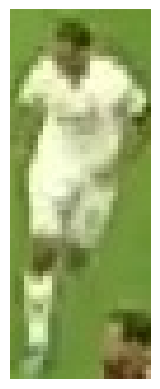

In [3]:
plt.imshow(img)
plt.axis('off')

## **Take the top half**

(np.float64(-0.5), np.float64(29.5), np.float64(38.5), np.float64(-0.5))

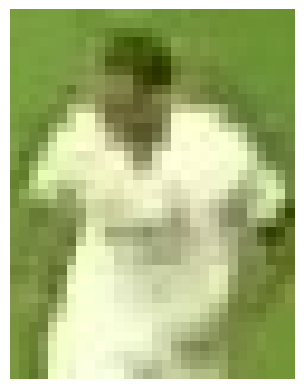

In [4]:
top_half_img = img[ : int(img.shape[0] / 2), :]

plt.imshow(top_half_img)
plt.axis('off')

## **Cluster**

In [5]:
from sklearn.cluster import KMeans

In [6]:
top_half_img.shape

(39, 30, 3)

In [7]:
vectors = top_half_img.reshape(-1, 3)
vectors.shape

(1170, 3)

In [8]:
# init model
kmeans = KMeans(n_clusters=2, random_state=42).fit(vectors)

# get cluster
labels = kmeans.labels_
labels


array([1, 1, 1, ..., 1, 1, 1], shape=(1170,), dtype=int32)

(np.float64(-0.5), np.float64(29.5), np.float64(38.5), np.float64(-0.5))

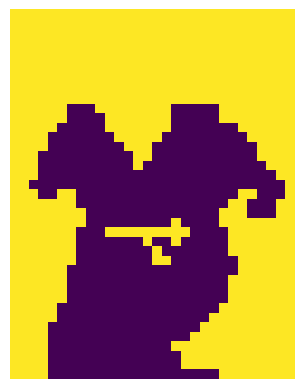

In [9]:
cluster_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

plt.imshow(cluster_img)
plt.axis('off')

In [10]:
# determine background , player label

bg_labels = [cluster_img[0, 0], cluster_img[0, -1], cluster_img[-1, 0], cluster_img[-1, -1]]
bg_label = max(set(bg_labels), key=bg_labels.count)
player_label = 1 - bg_label

bg_label, player_label

(np.int32(1), np.int32(0))

In [ ]:
kmeans.cluster_centers_[player_label] # center pixel

array([220.98308668, 227.32980973, 181.58985201])